In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

import os
from os.path import dirname

sysname = os.sys.platform
if sysname == 'win32':
    _sl = '\\'
elif sysname == 'linux':
    _sl = '/'
    
file_to_get = 'train.csv'

taxi_df = pd.read_csv(os.getcwd() + '{}_data{}'.format(_sl, _sl)\
                      + file_to_get)
taxi_df.head()

In [2]:
taxi_df = pd.read_csv(os.getcwd()+'/'+'train.csv')
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3495688,1,4/30/16 23:59,5/1/16 0:24,1,-73.987793,40.724792,-73.975616,40.656445,N,1454
1,id3051282,1,4/30/16 23:59,5/1/16 0:22,1,-73.957596,40.717770,-73.951424,40.775230,N,1409
2,id0082851,1,4/30/16 23:59,5/1/16 0:17,2,-74.000954,40.742031,-73.947708,40.782200,N,1081
3,id0515725,2,4/30/16 23:58,5/1/16 0:12,1,-73.985733,40.738258,-73.993179,40.754890,N,800
4,id1872374,2,4/30/16 23:58,5/1/16 0:17,1,-74.006615,40.740650,-73.985619,40.723362,N,1151


In [5]:
taxi_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3495688,1,4/30/16 23:59,5/1/16 0:24,1,-73.987793,40.724792,-73.975616,40.656445,N,1454
1,id3051282,1,4/30/16 23:59,5/1/16 0:22,1,-73.957596,40.717770,-73.951424,40.775230,N,1409
2,id0082851,1,4/30/16 23:59,5/1/16 0:17,2,-74.000954,40.742031,-73.947708,40.782200,N,1081
3,id0515725,2,4/30/16 23:58,5/1/16 0:12,1,-73.985733,40.738258,-73.993179,40.754890,N,800
4,id1872374,2,4/30/16 23:58,5/1/16 0:17,1,-74.006615,40.740650,-73.985619,40.723362,N,1151
5,id0312189,1,4/30/16 23:58,5/1/16 0:25,2,-73.997253,40.719234,-73.993835,40.762051,N,1619
6,id1462929,1,4/30/16 23:58,5/1/16 0:34,1,-73.994537,40.753037,-73.961098,40.687229,N,2209
7,id3799362,1,4/30/16 23:58,5/1/16 0:39,1,-73.873055,40.774086,-74.006378,40.738487,N,2458
8,id3607754,2,4/30/16 23:58,5/1/16 0:24,2,-73.980354,40.780540,-73.943390,40.835976,N,1584
9,id1733007,2,4/30/16 23:58,5/1/16 0:37,6,-73.782448,40.644691,-73.926926,40.703735,N,2337


In [3]:
%matplotlib inline

In [6]:
data =  pd.read_csv(os.getcwd()+'/'+'train.csv', parse_dates = ['pickup_datetime', 'trip_duration'])
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3495688,1,2016-04-30 23:59:00,5/1/16 0:24,1,-73.987793,40.724792,-73.975616,40.656445,N,1454
1,id3051282,1,2016-04-30 23:59:00,5/1/16 0:22,1,-73.957596,40.717770,-73.951424,40.775230,N,1409
2,id0082851,1,2016-04-30 23:59:00,5/1/16 0:17,2,-74.000954,40.742031,-73.947708,40.782200,N,1081
3,id0515725,2,2016-04-30 23:58:00,5/1/16 0:12,1,-73.985733,40.738258,-73.993179,40.754890,N,800
4,id1872374,2,2016-04-30 23:58:00,5/1/16 0:17,1,-74.006615,40.740650,-73.985619,40.723362,N,1151
5,id0312189,1,2016-04-30 23:58:00,5/1/16 0:25,2,-73.997253,40.719234,-73.993835,40.762051,N,1619
6,id1462929,1,2016-04-30 23:58:00,5/1/16 0:34,1,-73.994537,40.753037,-73.961098,40.687229,N,2209
7,id3799362,1,2016-04-30 23:58:00,5/1/16 0:39,1,-73.873055,40.774086,-74.006378,40.738487,N,2458
8,id3607754,2,2016-04-30 23:58:00,5/1/16 0:24,2,-73.980354,40.780540,-73.943390,40.835976,N,1584
9,id1733007,2,2016-04-30 23:58:00,5/1/16 0:37,6,-73.782448,40.644691,-73.926926,40.703735,N,2337


In [10]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [11]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [12]:
px, py = lat_lng_to_pixels(p_lat, p_lng)

In [13]:
px

0         29.447835
1         29.456223
2         29.444180
3         29.448407
4         29.442607
5         29.445207
6         29.445962
7         29.479707
8         29.449902
9         29.504876
10        29.445163
11        29.446827
12        29.445612
13        29.444497
14        29.450798
15        29.456978
16        29.447047
17        29.449984
18        29.442637
19        29.450453
20        29.449484
21        29.445907
22        29.444930
23        29.452322
24        29.458209
25        29.447560
26        29.457764
27        29.445320
28        29.455416
29        29.444305
            ...    
701748    29.449331
701749    29.447844
701750    29.452258
701751    29.479711
701752    29.446615
701753    29.457321
701754    29.449372
701755    29.447691
701756    29.452161
701757    29.448259
701758    29.450410
701759    29.445845
701760    29.462278
701761    29.447094
701762    29.442967
701763    29.447185
701764    29.455691
701765    29.447151
701766    29.446119


<function matplotlib.pyplot.show>

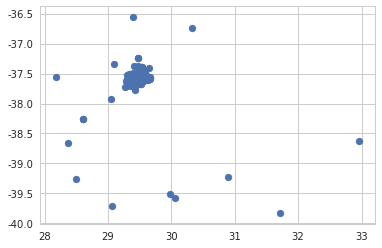

In [16]:
plt.scatter(px, py)
plt.show

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

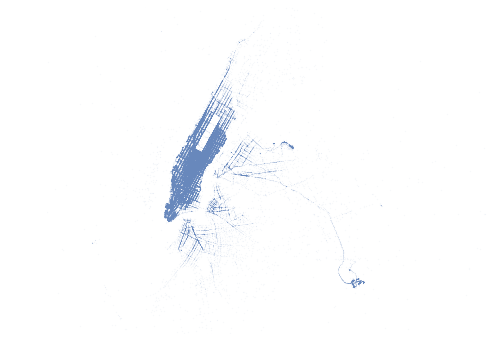

In [24]:
plt.figure(figsize = (8, 6))
plt.scatter(px, py, s = 1, alpha = 0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')
#맨하튼 지역과 유사한 지도가 표시됨

TypeError: must be str, not float

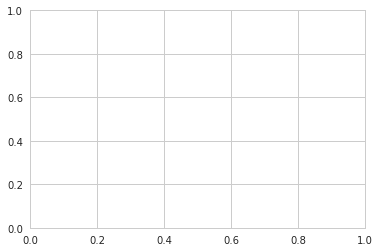

In [25]:
data.trip_duration.hist(bins = np.linspace(0., 10., 100))